In [52]:
## Import dependencies
import pandas as pd
import numpy as np

import datetime

In [172]:
df = pd.read_csv("COVID-19 journals with NaNs.csv")

In [161]:
print(df.shape)
df.head()

(29315, 6)


,Unnamed: 0,paper_id,title,abstract,body,origin
0,0,0015023cc06b5362d332b3baf348d11567ca2fbb,The RNA pseudoknots in foot-and-mouth disease ...,word count: 194 22 Text word count: 5168 23 2...,"VP3, and VP0 (which is further processed to V...",biorxiv_medrxiv
1,1,004f0f8bb66cf446678dc13cf2701feec4f36d76,Healthcare-resource-adjusted vulnerabilities t...,NaN,The 2019-nCoV epidemic has spread across Chin...,biorxiv_medrxiv
2,2,00d16927588fb04d4be0e6b269fc02f0d3c2aa7b,"Real-time, MinION-based, amplicon sequencing f...",Infectious bronchitis (IB) causes significant...,"Infectious bronchitis (IB), which is caused b...",biorxiv_medrxiv
3,3,0139ea4ca580af99b602c6435368e7fdbefacb03,A Combined Evidence Approach to Prioritize Nip...,Nipah Virus (NiV) came into limelight recentl...,Nipah is an infectious negative-sense single-...,biorxiv_medrxiv
4,4,013d9d1cba8a54d5d3718c229b812d7cf91b6c89,Assessing spread risk of Wuhan novel coronavir...,Background: A novel coronavirus (2019-nCoV) e...,"In December 2019, a cluster of patients with ...",biorxiv_medrxiv


## Creating a search engine in for the texts

In [194]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

In [199]:
start = datetime.datetime.now()

search_query = input("Please search for your topic: ")

stop_words = set(stopwords.words('english'))
stemmer = SnowballStemmer("english")

search_query = search_query.strip()
search_query = stemmer.stem(search_query)
search_query = search_query.lower().split(' ')


filtered_query = []
for word in search_query:
    if word not in stop_words:
        filtered_query.append(word)    
        
string = ""
for word in filtered_query:
    word = word + " "
    string = string + word

string = string.strip()

word_count = []
drops = []

for i, text in enumerate(df.body):
    text = text.lower()
    text = text.strip()
    text = stemmer.stem(text)
    z = 0
    for j in filtered_query:
        x = re.findall(j, text)
        for word in x:
            if x != '':
                z = z +1
    if z > 0:
        word_count.append(z)
        drops.append(True)
    else:
        drops.append(False)
        
print(datetime.datetime.now() - start)

new_df = df[drops]
new_df['word_counts'] = word_count

print("Your search has returned {} rows".format(new_df.shape[0]))


new_df.sort_values('word_counts', ascending = False)

Please search for your topic: Children
0:05:00.914399
Your search has returned 6648 rows


C:\Users\Jordan\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Unnamed: 0,paper_id,title,abstract,body,origin,word_counts
16324,16324,5f94b5f7e914cb87d2f607a1b0ef03c135b0a2da,NaN,Background: The regulatory IL-10 and TGF-$1 c...,Methods: In-vitro heat stability of the prote...,custom_license,786
6831,6831,a5293bb4f17ad25a72133cdd9eee8748dd6a4b8d,A1 Pirfenidone inhibits TGF-b1-induced extrace...,NaN,purpose of this study was to demonstrate the ...,comm_use subset,651
26923,26923,ff78ee43150a59344d0a0cd68298c02032b43991,NaN,NaN,Childhood illnesses are simple yet complex: S...,custom_license,344
21608,21608,af12506602b8b4600d42d2d0d4bc4b6d55c14f82,NaN,NaN,No bacterial pathogen can be isolated from th...,custom_license,300
12098,12098,2008f024274c53b0de1276f4047a6a641813fd98,ABSTRACTS: CONCURRENT SESSIONS,NaN,INTRODUCTION: The effect of anti IgE has been...,custom_license,222
...,...,...,...,...,...,...,...
17670,17670,73efc9aea409e5b761f806c5ab711069d3b47329,Viral Infections of Rabbits KEYWORDS Borna dis...,Rabbit hemorrhagic disease is caused by a cal...,Viral diseases in rabbits are infrequently en...,custom_license,1
17673,17673,73f2fda066f6636e2ba50d8fa90bb098fcc35337,Factors influencing the wearing of facemasks t...,Background. The global outbreak of the severe...,A new and highly infectious disease in humans...,custom_license,1
17681,17681,740e2079b3b8d3391e4a1816e2cf8a9e533575fe,Emerging technologies and bio-threats Chapter ...,NaN,The role of the Institutional Biosafety Commi...,custom_license,1
17689,17689,742457370d1fd40e80e465678c29430b9408448d,Twenty-five years of type I interferon-based t...,NaN,In his book on the history of interferon (IFN...,custom_license,1


## Creating a DTM from the filtered search and Clustering

In [221]:
#------------------------------------------------------------------------------------------------
# Putting it all together in one step
# Function (tokenize) that uses Porter stemmer and tokenizes the document
#------------------------------------------------------------------------------------------------

import nltk
from nltk import wordpunct_tokenize          
from nltk.stem.porter import PorterStemmer

en_stop = stopwords.words('english')

print(datetime.datetime.now())


stemmer = PorterStemmer()
def stem_tokens(tokens, stemmer):
    stemmed = []
    for item in tokens:
        stemmed.append(stemmer.stem(item))
    return stemmed

def tokenize(text):
    tokens = nltk.word_tokenize(text.lower())
    stems = stem_tokens(tokens, stemmer)
    return stems

# Using the above function "tokenize" in CountVectorize function
# tokenize stems and tokenizes altogether

searched_list = new_df.body.to_list()

vect = CountVectorizer(tokenizer=tokenize, stop_words = en_stop, ngram_range= (1,2),max_features = 1000)
print(datetime.datetime.now())

vect.fit(searched_list)
print(datetime.datetime.now())

dtm = vect.transform(searched_list)
print(datetime.datetime.now())

dfdtm = pd.DataFrame(dtm.toarray(), columns=vect.get_feature_names())
print(datetime.datetime.now())

2020-04-05 23:46:24.929649
2020-04-05 23:46:25.204281


C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:507: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"
C:\Users\Jordan\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'ll", "'re", "'s", "'ve", 'abov', 'ani', 'becaus', 'befor', 'could', 'doe', 'dure', 'ha', 'hi', 'might', 'must', "n't", 'need', 'onc', 'onli', 'ourselv', 'sha', 'themselv', 'thi', 'veri', 'wa', 'whi', 'wo', 'would', 'yourselv'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


2020-04-06 00:07:08.383148
2020-04-06 00:29:49.407562
2020-04-06 00:29:49.462564


In [222]:
dfdtm.shape

(6648, 1000)

In [223]:
dfdtm.to_csv("first dtm.csv")

In [224]:
## Now we can use TfidfTransformer on the frequency term DTM to make a weighted TFIDF
from sklearn.feature_extraction.text import TfidfTransformer


## Below uses l2 normalization as default, use_idf default is True
tfdif = TfidfTransformer()

dtm2 = tfdif.fit_transform(dtm)

weighted_df = pd.DataFrame(dtm2.toarray(), columns=vect.get_feature_names())

In [225]:
weighted_df.head()

,%,% (,% ),"% ,",% .,&,','','s,(,...,worker,world,would,year,"year ,",year .,yet,young,±,•
0,0.032987,0.005537,0.003836,0.011853,0.002624,0.0,0.006160,0.000000,0.000000,0.124292,...,0.000000,0.002228,0.027460,0.008891,0.000000,0.002411,0.002419,0.000000,0.0,0.082226
1,0.011257,0.011337,0.007854,0.000000,0.000000,0.0,0.000000,0.038023,0.006256,0.146925,...,0.006285,0.000000,0.011245,0.003034,0.000000,0.000000,0.000000,0.009271,0.0,0.000000
2,0.031122,0.006268,0.013028,0.000000,0.000000,0.0,0.000000,0.004672,0.000000,0.162479,...,0.000000,0.010089,0.012436,0.087240,0.025218,0.038222,0.005477,0.005126,0.0,0.042315
3,0.146317,0.000000,0.060247,0.004137,0.036637,0.0,0.000000,0.003601,0.018663,0.091682,...,0.096416,0.003888,0.012779,0.007758,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
4,0.033241,0.000000,0.011596,0.014333,0.000000,0.0,0.012416,0.006238,0.023092,0.154947,...,0.009279,0.000000,0.000000,0.008960,0.000000,0.000000,0.000000,0.000000,0.0,0.000000


In [226]:
## Standardizing data (just in case) before running dimenison-reduction techniques
scaler = StandardScaler()

keep_std = scaler.fit_transform(weighted_df)




In [229]:
#Code ran for 300,000 rows by 3000 tokens

from sklearn.decomposition import PCA

pca = PCA(0.80)  #Keep the amount of variance explained to 80% 
pca.fit(keep_std)

pca.n_components_ 

468

In [232]:
import umap
from sklearn.decomposition import SparsePCA

print(datetime.datetime.now())

sparsepca=SparsePCA(n_components=2)
sparse_pca_components = sparsepca.fit_transform(keep_std)

print(datetime.datetime.now())

umap_fun = umap.UMAP(n_neighbors=15)
umap_components = umap_fun.fit_transform(keep_std)

print(datetime.datetime.now())

pca_components = pca.fit_transform(keep_std)

2020-04-06 08:28:29.500243
2020-04-06 08:33:19.610974


C:\Users\Jordan\Anaconda3\lib\site-packages\numba\typed_passes.py:293: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "..\..\Anaconda3\lib\site-packages\umap\rp_tree.py", line 135:
@numba.njit(fastmath=True, nogil=True, parallel=True)
def euclidean_random_projection_split(data, indices, rng_state):
^

  state.func_ir.loc))
C:\Users\Jordan\Anaconda3\lib\site-packages\numba\typed_passes.py:293: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "..\..\Anaconda3\lib\site-packages\umap\rp_tree.py", line 135:
@numba.njit(fastmath=T

2020-04-06 08:36:30.036657


In [234]:
## Creating dataframes from componenets

# PCA dataframe
cols = []
for i in range (1, 469):
    cols.append("PC" + str(i))

PCdf = pd.DataFrame(pca_components, columns = cols)
PCdf.head()



,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC459,PC460,PC461,PC462,PC463,PC464,PC465,PC466,PC467,PC468
0,-1.375447,4.066014,-4.596055,4.117652,-2.161422,-2.314142,-7.460497,6.671953,-0.652505,4.894277,...,0.523004,0.172858,-1.050871,-0.458477,-0.068076,0.094419,-0.796811,0.028964,-0.519061,0.345674
1,-3.221037,5.713265,-2.883823,1.149805,3.554260,-0.853058,-7.344635,11.628231,-1.812719,-1.636818,...,-1.112272,0.578165,0.991679,-0.841785,0.842622,-0.032935,0.753817,0.357210,0.357546,0.801668
2,-1.312376,2.673488,-5.466750,-2.207885,0.201092,-2.610654,-9.417248,7.477780,-4.565984,3.468279,...,-0.436440,-0.027885,-1.141388,-1.344339,-0.061930,-0.560286,-0.724189,-0.077261,1.144518,1.042544
3,-5.188329,4.058947,-2.985364,-0.591673,-3.638651,1.502486,-0.803032,3.570058,-2.932715,2.298338,...,-0.522697,-0.502550,1.531215,0.006227,0.006351,1.040784,1.061449,0.207038,0.200613,0.164326
4,-0.493518,3.536797,-3.726911,1.760023,-5.565411,-3.958987,-3.113474,-1.385118,-0.349881,-2.999821,...,-1.547669,0.100877,0.598419,0.296533,1.133024,0.472738,1.572426,-0.950646,0.201773,-0.138027


In [236]:
# SparsePCA dataframe
cols = []
for i in range (1, 3):
    cols.append("SparsePC" + str(i))

SparsePCdf= pd.DataFrame(sparse_pca_components, columns = cols)
SparsePCdf.head()


,SparsePC1,SparsePC2
0,-3.510802,-2.243614
1,-5.868501,-2.475132
2,-2.514549,-1.135454
3,-6.378396,0.005523
4,-2.533075,-2.451348


In [237]:
# UMAP dataframe

cols = []
for i in range (1, 3):
    cols.append("UMAP" + str(i))

umapdf = pd.DataFrame(umap_components, columns = cols)
umapdf.head()



,UMAP1,UMAP2
0,-1.201138,1.827457
1,0.060040,-0.357575
2,0.012615,1.457170
3,0.011813,-0.001590
4,0.746147,0.101314


In [238]:
from sklearn.cluster import KMeans

labels = []

print(datetime.datetime.now())
kmeans = KMeans(n_clusters= 7, n_jobs=-1)
kmeans = kmeans.fit(umapdf)
labelPCdf = kmeans.labels_
labels.append(labelPCdf)
centroids = kmeans.cluster_centers_
centroids[:, 0]
print(stats.itemfreq(labelPCdf))

2020-04-06 08:48:01.016247
[[   0 1000]
 [   1 1157]
 [   2 1111]
 [   3 1306]
 [   4  988]
 [   5   94]
 [   6  992]]


C:\Users\Jordan\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: DeprecationWarning: `itemfreq` is deprecated!
`itemfreq` is deprecated and will be removed in a future version. Use instead `np.unique(..., return_counts=True)`
  if sys.path[0] == '':


In [266]:
umapdf["Clusters"] = labels[0]

In [267]:
umapdf.head()

,UMAP1,UMAP2,Clusters
0,-1.201138,1.827457,0
1,0.060040,-0.357575,6
2,0.012615,1.457170,0
3,0.011813,-0.001590,6
4,0.746147,0.101314,6


Text(0, 0.5, 'UMAP2')

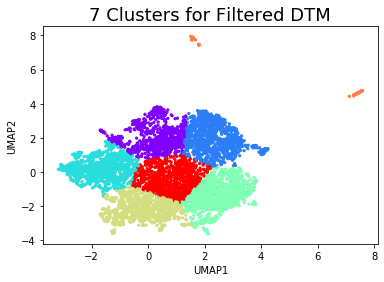

In [269]:
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

fig = plt.figure() 
ax = fig.add_subplot(111) 
ax.scatter(umapdf.iloc[:,0], umapdf.iloc[:,1], c = labels[0], cmap='rainbow', alpha=1, s= 5)  
plt.title(str(len(set(labels[0]))) + " Clusters for Filtered DTM", fontsize=18)
plt.xlabel("UMAP1")
plt.ylabel("UMAP2")

Text(0.5, 1.0, 'Filtered Articles Embedded via UMAP')

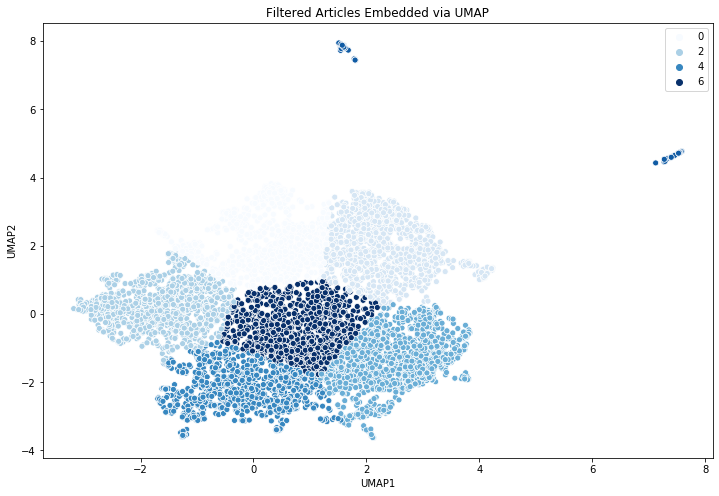

In [274]:
classes = ['0','1', '2', '3', '4', '5','6']

fig, ax = plt.subplots(1, figsize=(12, 8))

sns.scatterplot(x = umapdf.iloc[:,0], y = umapdf.iloc[:,1], hue = labels[0], palette= 'Blues') 

plt.title('Filtered Articles Embedded via UMAP')

In [11]:
bodytext_list = df_body.body.to_list()

In [12]:
len(bodytext_list)

29315

## In Order to try and build an LDA (Latent Dirichet Allocation) model, I followed along with this article:
Please Note: The LDA model isn't my code--I'm trying to understand and learn what is happening with LDA models.
https://towardsdatascience.com/building-a-topic-modeling-pipeline-with-spacy-and-gensim-c5dc03ffc619

In [207]:
pip install spacy

Note: you may need to restart the kernel to use updated packages.


In [244]:
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

import spacy
from spacy.lemmatizer import Lemmatizer
from spacy.lang.en.stop_words import STOP_WORDS
import en_core_web_sm

from tqdm import tqdm_notebook as tqdm
from pprint import pprint

In [252]:
## Creating corpus, doing a sample of 100 journals to test out the model
newest_doc = df['body']
newest_doc = newest_doc.head(100)

In [253]:
nlp= spacy.load("en")


# Length of stop words in spacy



In [254]:
def lemmatizer(doc):
    # This takes in a doc of tokens from the NER and lemmatizes them. 
    # Pronouns (like "I" and "you" get lemmatized to '-PRON-', so I'm removing those.
    doc = [token.lemma_ for token in doc if token.lemma_ != '-PRON-']
    doc = u' '.join(doc)
    return nlp.make_doc(doc)
    
def remove_stopwords(doc):
    # This will remove stopwords and punctuation.
    # Use token.text to return strings, which we'll need for Gensim.
    doc = [token.text for token in doc if token.is_stop != True and token.is_punct != True]
    return doc

# The add_pipe function appends our functions to the default pipeline.
nlp.add_pipe(lemmatizer,name='lemmatizer',after='ner')
nlp.add_pipe(remove_stopwords, name="stopwords", last=True)

In [255]:

doc_list = []
# Iterates through each article in the corpus.
for doc in tqdm(newest_doc):
    # Passes that article through the pipeline and adds to a new list.
    pr = nlp(doc)
    doc_list.append(pr)

C:\Users\Jordan\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  This is separate from the ipykernel package so we can avoid doing imports until


In [256]:

doc_list = []
# Iterates through each article in the corpus.
for doc in tqdm(newest_doc):
    # Passes that article through the pipeline and adds to a new list.
    pr = nlp(doc)
    doc_list.append(pr)

C:\Users\Jordan\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  This is separate from the ipykernel package so we can avoid doing imports until


In [257]:

# Creates, which is a mapping of word IDs to words.
words = corpora.Dictionary(doc_list)

# Turns each document into a bag of words.
corpus = [words.doc2bow(doc) for doc in doc_list]

In [258]:
## Running the model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=words,
                                           num_topics=10, 
                                           random_state=2,
                                           update_every=1,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [259]:
## Below are the "topics" generated from the LDA model

pprint(lda_model.print_topics(num_words = 10))

[(0,
  '0.011*"RNA" + 0.008*"use" + 0.008*"sequence" + 0.007*"bee" + 0.007*"jelly" '
  '+ 0.006*"Fig" + 0.005*"read" + 0.005*"dsrna" + 0.005*"preprint" + '
  '0.004*"worker"'),
 (1,
  '0.011*"cell" + 0.010*"preprint" + 0.008*"use" + 0.005*"Fig" + '
  '0.005*"effect" + 0.005*"et" + 0.005*"al" + 0.005*"copyright" + '
  '0.005*"holder" + 0.005*"review"'),
 (2,
  '0.707*"q" + 0.007*"preprint" + 0.005*"datum" + 0.005*"week" + 0.005*"use" + '
  '0.004*"license" + 0.004*"qq" + 0.003*"medRxiv" + 0.003*"incidence" + '
  '0.003*"country"'),
 (3,
  '0.014*"case" + 0.013*"preprint" + 0.009*"license" + 0.009*"number" + '
  '0.009*"patient" + 0.008*"estimate" + 0.008*"1" + 0.007*"model" + '
  '0.007*"medRxiv" + 0.006*"0"'),
 (4,
  '0.010*"preprint" + 0.009*"use" + 0.007*"sequence" + 0.007*"genome" + '
  '0.007*"RNA" + 0.006*"viral" + 0.006*"cell" + 0.006*"protein" + '
  '0.006*"review" + 0.006*"peer"'),
 (5,
  '0.011*"preprint" + 0.009*"use" + 0.006*"RNA" + 0.006*"Fig" + 0.006*"cell" + '
  '0.006*"a

## Attempting Word2Vec

## Below I was trying to play around with both nltk and keras for DTMS

## Preparing the text with nltk

In [36]:
from nltk.tokenize import word_tokenize

import string
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

In [50]:
# split into words
NLTKtokens = word_tokenize(bodytext_list[0])
print(NLTKtokens[:100])
print(len(NLTKtokens))

['VP3', ',', 'and', 'VP0', '(', 'which', 'is', 'further', 'processed', 'to', 'VP2', 'and', 'VP4', 'during', 'virus', 'assembly', ')', '(', '6', ')', '.', 'The', 'P2', '64', 'and', 'P3', 'regions', 'encode', 'the', 'non-structural', 'proteins', '2B', 'and', '2C', 'and', '3A', ',', '3B', '(', '1-3', ')', '(', 'VPg', ')', ',', '3C', 'pro', 'and', '4', 'structural', 'protein-coding', 'region', 'is', 'replaced', 'by', 'reporter', 'genes', ',', 'allow', 'the', 'study', 'of', 'genome', '68', 'replication', 'without', 'the', 'requirement', 'for', 'high', 'containment', '(', '9', ',', '10', ')', '(', 'figure', '1A', ')', '.', 'The', 'FMDV', '5′', 'UTR', 'is', 'the', 'largest', 'known', 'picornavirus', 'UTR', ',', 'comprising', 'approximately', '1300', '71', 'nucleotides', 'and', 'containing', 'several']
1977


In [40]:
# remove all tokens that are not alphabetic
NLTKwords = [word for word in NLTKtokens if word.isalpha()]
print(NLTKwords[:100])
print(len(NLTKwords))

['and', 'which', 'is', 'further', 'processed', 'to', 'and', 'during', 'virus', 'assembly', 'The', 'and', 'regions', 'encode', 'the', 'proteins', 'and', 'and', 'VPg', 'pro', 'and', 'structural', 'region', 'is', 'replaced', 'by', 'reporter', 'genes', 'allow', 'the', 'study', 'of', 'genome', 'replication', 'without', 'the', 'requirement', 'for', 'high', 'containment', 'figure', 'The', 'FMDV', 'UTR', 'is', 'the', 'largest', 'known', 'picornavirus', 'UTR', 'comprising', 'approximately', 'nucleotides', 'and', 'containing', 'several', 'highly', 'structured', 'regions', 'The', 'first', 'nucleotides', 'at', 'the', 'end', 'are', 'predicted', 'to', 'fold', 'into', 'a', 'single', 'large', 'stem', 'loop', 'termed', 'the', 'followed', 'by', 'a', 'The', 'PKs', 'were', 'originally', 'predicted', 'in', 'and', 'consist', 'of', 'two', 'to', 'four', 'tandem', 'repeats', 'of', 'a', 'nucleotide', 'region', 'containing', 'a']
1501


In [41]:
stop_words = stopwords.words('english')
print(stop_words)


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [55]:
## All together
## Tokenize all words in the corpus
body_tokens = []

a = datetime.datetime.now()
print(a)

# loop through document list
for body in bodytext_list:
    
    NLTKtokens = word_tokenize(body)

    # convert to lower case
    NLTKtokens = [w.lower() for w in NLTKtokens]

    # prepare regex for char filtering
    re_punc = re.compile('[%s]' % re.escape(string.punctuation))

    # remove punctuation from each word
    # sub function susbstitutes punctuation with nothing
    stripped = [re_punc.sub('', w) for w in NLTKtokens]

    # remove remaining tokens that are not alphabetic
    NLTKwords = [word for word in stripped if word.isalpha()]

    # filter out stop words
#     stop_words = set(stopwords.words('english'))
#     NLTKwords = [w for w in NLTKwords if not w in stop_words]
    
    
    body_tokens.append(NLTKwords)

b = datetime.datetime.now()
print(b)

2020-04-04 18:40:26.583449
2020-04-04 18:58:54.628666


In [56]:
body_tokens[0]

['and',
 'which',
 'is',
 'further',
 'processed',
 'to',
 'and',
 'during',
 'virus',
 'assembly',
 'the',
 'and',
 'regions',
 'encode',
 'the',
 'nonstructural',
 'proteins',
 'and',
 'and',
 'vpg',
 'pro',
 'and',
 'structural',
 'proteincoding',
 'region',
 'is',
 'replaced',
 'by',
 'reporter',
 'genes',
 'allow',
 'the',
 'study',
 'of',
 'genome',
 'replication',
 'without',
 'the',
 'requirement',
 'for',
 'high',
 'containment',
 'figure',
 'the',
 'fmdv',
 'utr',
 'is',
 'the',
 'largest',
 'known',
 'picornavirus',
 'utr',
 'comprising',
 'approximately',
 'nucleotides',
 'and',
 'containing',
 'several',
 'highly',
 'structured',
 'regions',
 'the',
 'first',
 'nucleotides',
 'at',
 'the',
 'end',
 'are',
 'predicted',
 'to',
 'fold',
 'into',
 'a',
 'single',
 'large',
 'stem',
 'loop',
 'termed',
 'the',
 'sfragment',
 'followed',
 'by',
 'a',
 'the',
 'pks',
 'were',
 'originally',
 'predicted',
 'in',
 'and',
 'consist',
 'of',
 'two',
 'to',
 'four',
 'tandem',
 'repe

## Preparing text with keras

In [32]:
import tensorflow as tf
from keras.preprocessing.text import text_to_word_sequence

# tokenize the first review document
result = text_to_word_sequence(bodytext_list[0])

## There are 632 unique words in the first article
print(len(set(result)))

632


In [26]:
from keras.preprocessing.text import Tokenizer

# create the tokenizer
t = Tokenizer()

# fit the tokenizer on the documents
t.fit_on_texts(bodytext_list)

t2 = Tokenizer(lower = False)

t2.fit_on_texts(bodytext_list)

In [34]:
## Number of tokens learnt
print("The number of tokens when lowercased: " + str(len(t.word_counts)))

## Number of documents
print(t.document_count)

## Number of tokens learnt
print("The number of tokens when not lowercased: " + str(len(t2.word_counts)))

## Number of documents
print(t2.document_count)

print("The difference in tokens between not lowercasing and lowercasing: " + str(len(t2.word_counts) - len(t.word_counts)))

## let's keep them lowercased for now. 

The number of tokens when lowercased: 887618
29315
The number of tokens when not lowercased: 1018218
29315
The difference in tokens between not lowercasing and lowercasing: 130600


### DTM from Keras

In [176]:
## First, we're going to filter out stopwords and non-alphabetical words before we create a DTM

a = datetime.datetime.now()

nbody_list = []
for i,text in enumerate(bodytext_list):
    # split into tokens by white space
    tokens = text.split()

    # remove remaining tokens that are not alphabetic
    tokens = [word for word in tokens if word.isalpha()]

    # filter out stop words
    stop_words = set(stopwords.words('english'))
    tokens = [w for w in tokens if not w in stop_words]

    ntokens = ' '.join(tokens)
    nbody_list.append(ntokens)


print(datetime.datetime.now() - a)


0:00:51.535800


In [180]:
# create the tokenizer
t = Tokenizer(num_words = 3000)

# fit the tokenizer on the documents
t.fit_on_texts(nbody_list)



In [181]:
print(datetime.datetime.now())

enconded_binary = t.texts_to_matrix(nbody_list, mode = 'binary')
print(datetime.datetime.now())

enconded_count = t.texts_to_matrix(nbody_list, mode = 'count')
print(datetime.datetime.now())

enconded_freq = t.texts_to_matrix(nbody_list, mode = 'freq')
print(datetime.datetime.now())

encoded_tfidf = t.texts_to_matrix(nbody_list, mode = 'tfidf')
print(datetime.datetime.now())

2020-04-05 20:24:05.502604
2020-04-05 20:25:13.108446
2020-04-05 20:26:20.905481
2020-04-05 20:27:41.315337
2020-04-05 20:31:31.564543


In [182]:
encoded_tfidf.shape

(29315, 3000)